## Local

Local tools operate at the cell level, where values with the same position from a set of input rasters are used to calculate the values of the cells at the output raster.

Some examples of the application of local tools are:

- Change over time: You can use local tools to identify places where a value like land use or temperature changed over time.  
- Aggregate over time: You can use local tools to aggregate values over time, for example calculating the average rainfall or hours of sunshine for each cell.  
- Threshold over time: You can use local tools to identify places where a value is above or below a specified threshold, for example where the temperature was below a 0 °C.  
- Data aggregation: You can use local tools to calculate the [cost surface](http://wiki.gis.com/wiki/index.php/Cost_surface) of an area, summing up different types of cost over the same cell in different layers.  

In this notebook, we'll demonstrate how to use the [Xarray-spatial](http://xarray-spatial.readthedocs.io/) local tools functions supported by [Numpy](https://numpy.org/). The spatial functions available are:

- [Cell Statistics](#Cell-Statistics)  
- [Combine](#Combine)  
- [Lesser Frequency](#Lesser-Frequency)  
- [Equal Frequency](#Equal-Frequency)  
- [Greater Frequency](#Greater-Frequency)  
- [Lowest Position](#Lowest-Position)  
- [Highest Position](#Highest-Position)  
- [Popularity](#Popularity)  
- [Rank](#Rank)  

### Creating the sample data

In order to present the functions in a very simple and easy to understand way, we'll use 4x4 data arrays and create an `xarray.Dataset`.

In [1]:
import numpy as np
import xarray as xr

arr = xr.DataArray([[2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2], [2, 2, 2, 2]], name="arr")

arr1 = xr.DataArray(
    [[np.nan, 4, 2, 0], [2, 3, np.nan, 1], [5, 1, 2, 0], [1, 3, 2, np.nan]], name="arr1"
)

arr2 = xr.DataArray(
    [[3, 1, 1, 2], [4, 1, 2, 5], [0, 0, 0, 0], [np.nan, 1, 1, 1]], name="arr2"
)

arr3 = xr.DataArray(
    [[3, 3, 2, 0], [4, 1, 3, 1], [6, 1, 2, 2], [0, 0, 1, 1]], name="arr3"
)

raster_ds = xr.merge([arr, arr1, arr2, arr3])

### Helping functions

This function will be used to plot the arrays for all the examples in this notebook.

In [2]:
import matplotlib.pyplot as plt


def plot_arrays(arr_list, title_list):
    fig, ax = plt.subplots(nrows=1, ncols=len(arr_list), figsize=(15, 10))

    for idx, arr in zip(range(0, len(arr_list)), arr_list):
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                ax[idx].text(
                    j,
                    i,
                    int(arr.data[i, j]) if str(arr.data[i, j]) != "nan" else np.nan,
                    ha="center",
                    va="center",
                    color="black",
                )

        ax[idx].imshow(arr.values, cmap="tab20c_r")
        ax[idx].set_xticks([])
        ax[idx].set_yticks([])
        ax[idx].set_title(title_list[idx])

    plt.show()

### Cell Statistics

[xrspatial.local.cell_stats](https://xarray-spatial.readthedocs.io/reference/_autosummary/xrspatial.local.cell_stats.html) calculates statistics from a raster dataset on a cell-by-cell basis.

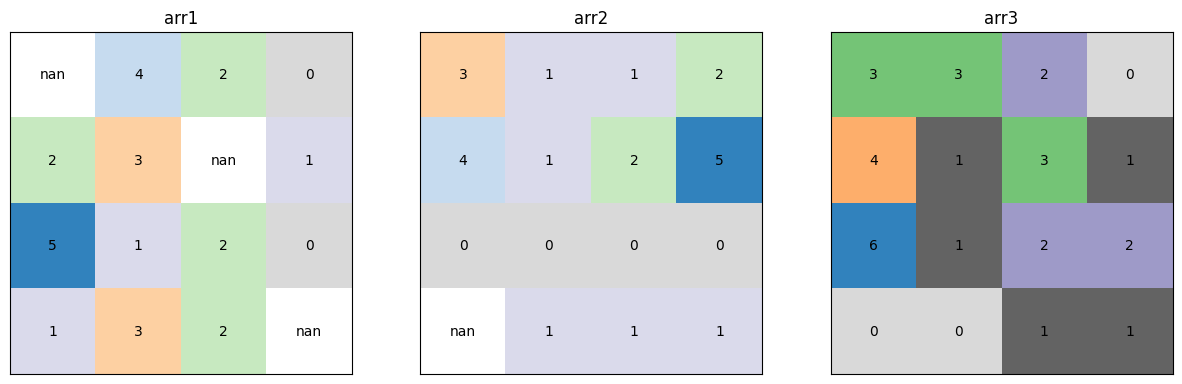

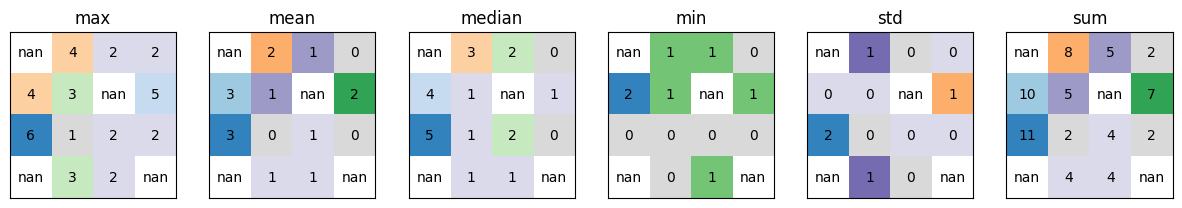

In [3]:
from xrspatial.local import cell_stats

func_list = ["max", "mean", "median", "min", "std", "sum"]
statistics = [
    cell_stats(raster=raster_ds[["arr1", "arr2", "arr3"]], func=func)
    for func in func_list
]

plot_arrays(
    [
        raster_ds["arr1"],
        raster_ds["arr2"],
        raster_ds["arr3"],
    ],
    ["arr1", "arr2", "arr3"],
)

plot_arrays(statistics, func_list)

### Combine

[xrspatial.local.combine](https://xarray-spatial.readthedocs.io/reference/_autosummary/xrspatial.local.combine.html) combines multiple arrays from a raster dataset, assigning a unique output value to each unique combination of raster values.

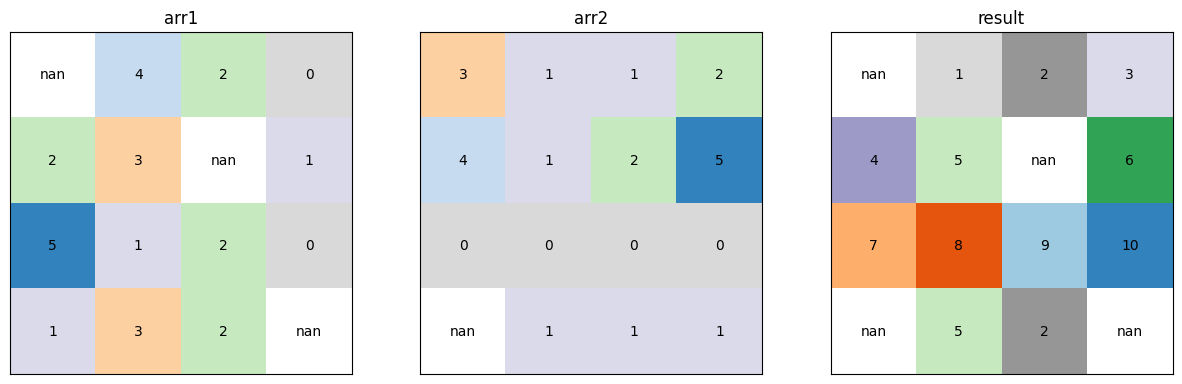

In [4]:
from xrspatial.local import combine

result_arr = combine(raster=raster_ds[["arr1", "arr2"]])

plot_arrays(
    [
        raster_ds["arr1"],
        raster_ds["arr2"],
        result_arr,
    ],
    ["arr1", "arr2", "result"],
)

### Lesser-Frequency

[xrspatial.local.lesser_frequency](https://xarray-spatial.readthedocs.io/reference/_autosummary/xrspatial.local.lesser_frequency.html) calculates, given a raster dataset, the number of times the data variables values are lower than the values of a given reference data variable on a cell-by-cell basis.

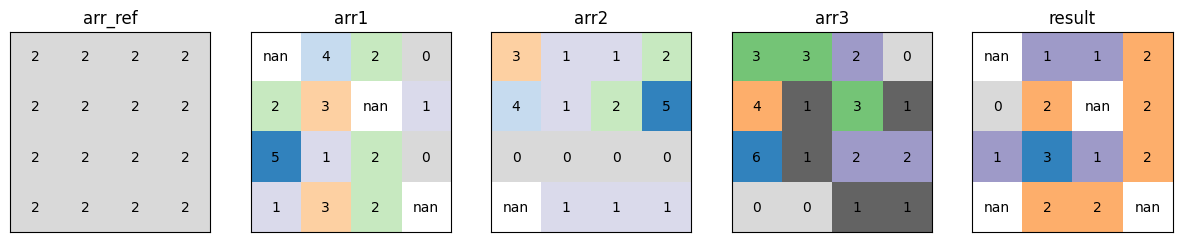

In [5]:
from xrspatial.local import lesser_frequency

result_arr = lesser_frequency(raster=raster_ds, ref_var="arr")

plot_arrays(
    [
        raster_ds["arr"],
        raster_ds["arr1"],
        raster_ds["arr2"],
        raster_ds["arr3"],
        result_arr,
    ],
    ["arr_ref", "arr1", "arr2", "arr3", "result"],
)

### Equal Frequency

[xrspatial.local.equal_frequency](https://xarray-spatial.readthedocs.io/reference/_autosummary/xrspatial.local.equal_frequency.html) calculates, given a raster dataset, the number of times the data variables values are equal than the values of a given reference data variable on a cell-by-cell basis.

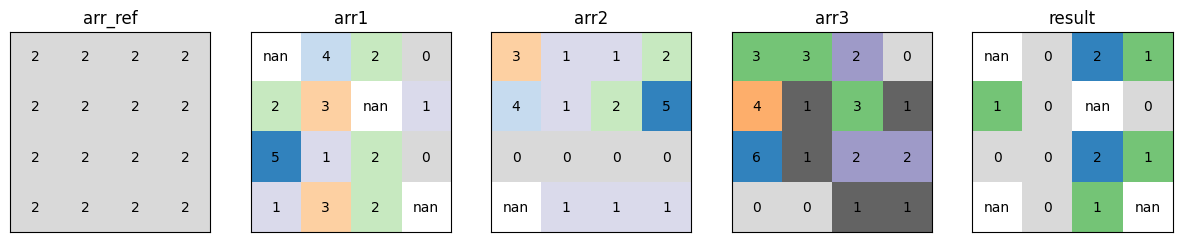

In [6]:
from xrspatial.local import equal_frequency

result_arr = equal_frequency(raster=raster_ds, ref_var="arr")

plot_arrays(
    [
        raster_ds["arr"],
        raster_ds["arr1"],
        raster_ds["arr2"],
        raster_ds["arr3"],
        result_arr,
    ],
    ["arr_ref", "arr1", "arr2", "arr3", "result"],
)

### Greater Frequency

[xrspatial.local.greater_frequency](https://xarray-spatial.readthedocs.io/reference/_autosummary/xrspatial.local.greater_frequency.html) calculates, given a raster dataset, the number of times the data variables values are greater than the values of a given reference data variable on a cell-by-cell basis.

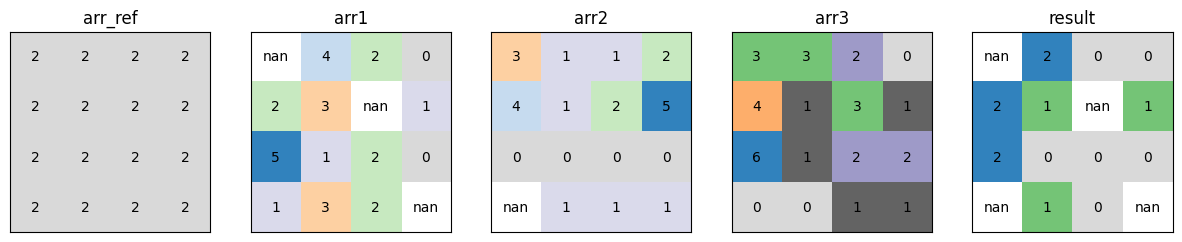

In [7]:
from xrspatial.local import greater_frequency

result_arr = greater_frequency(raster=raster_ds, ref_var="arr")

plot_arrays(
    [
        raster_ds["arr"],
        raster_ds["arr1"],
        raster_ds["arr2"],
        raster_ds["arr3"],
        result_arr,
    ],
    ["arr_ref", "arr1", "arr2", "arr3", "result"],
)

### Lowest Position

[xrspatial.local.lowest_position](https://xarray-spatial.readthedocs.io/reference/_autosummary/xrspatial.local.lowest_position.html) calculates the data variable index of the lowest value on a cell-by-cell basis.

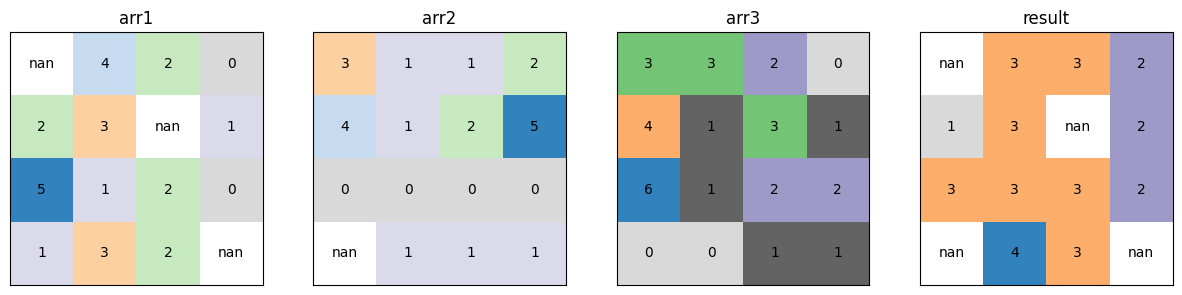

In [8]:
from xrspatial.local import lowest_position

result_arr = lowest_position(raster=raster_ds)

plot_arrays(
    [
        raster_ds["arr1"],
        raster_ds["arr2"],
        raster_ds["arr3"],
        result_arr,
    ],
    ["arr1", "arr2", "arr3", "result"],
)

### Highest Position

[xrspatial.local.highest_position](https://xarray-spatial.readthedocs.io/reference/_autosummary/xrspatial.local.highest_position.html) calculates the data variable index of the highest value on a cell-by-cell basis.

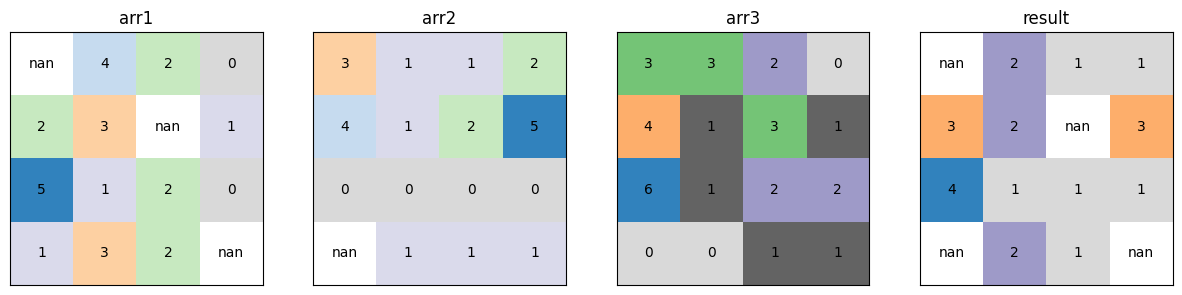

In [9]:
from xrspatial.local import highest_position

result_arr = highest_position(raster=raster_ds)

plot_arrays(
    [
        raster_ds["arr1"],
        raster_ds["arr2"],
        raster_ds["arr3"],
        result_arr,
    ],
    ["arr1", "arr2", "arr3", "result"],
)

### Popularity

[xrspatial.local.popularity](https://xarray-spatial.readthedocs.io/reference/_autosummary/xrspatial.local.popularity.html) calculates the number of occurrences of each value of a raster dataset, on a cell-by-cell basis. The output value is assigned based on the reference data variable nth most popular.

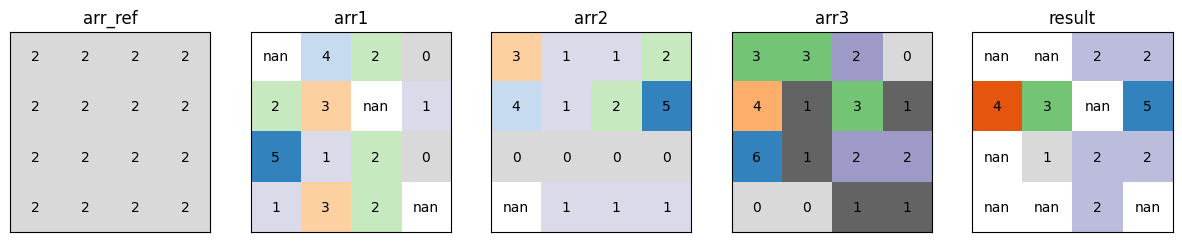

In [10]:
from xrspatial.local import popularity


result_arr = popularity(raster=raster_ds, ref_var="arr")

plot_arrays(
    [
        raster_ds["arr"],
        raster_ds["arr1"],
        raster_ds["arr2"],
        raster_ds["arr3"],
        result_arr,
    ],
    ["arr_ref", "arr1", "arr2", "arr3", "result"],
)

### Rank

[xrspatial.local.rank](https://xarray-spatial.readthedocs.io/reference/_autosummary/xrspatial.local.rank.html) calculates the rank of each value of a raster dataset, on a cell-by-cell basis. The output value is assigned based on the rank of the reference data variable rank.

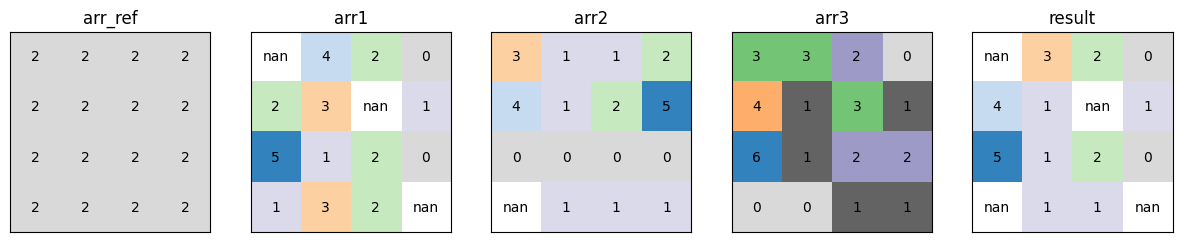

In [11]:
from xrspatial.local import rank

result_arr = rank(raster=raster_ds, ref_var="arr")

plot_arrays(
    [
        raster_ds["arr"],
        raster_ds["arr1"],
        raster_ds["arr2"],
        raster_ds["arr3"],
        result_arr,
    ],
    ["arr_ref", "arr1", "arr2", "arr3", "result"],
)